## Hands-on - Probability Distributions and Variability

In [207]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency, ttest_ind

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [208]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


In [209]:
# Get quantiles and interquantile range
q1 = df['CSIRO Adjusted Sea Level'].quantile(0.25)
q3 = df['CSIRO Adjusted Sea Level'].quantile(0.75)
iqr = q3 - q1

# Add outliers to a list
outliers = []

for i in df['CSIRO Adjusted Sea Level']:
    if i < (q1 - 1.5 * iqr) or i > (q3 + 1.5 * iqr):
        outliers.append(i)
   
# Print number of outliers in data     
print(len(outliers))

0


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?

          Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
Decade                                                        
1880    1884.5                  0.198425          -0.673622   
1890    1894.5                  0.659449          -0.154331   
1900    1904.5                  1.214173           0.579528   
1910    1914.5                  1.732677           1.198425   
1920    1924.5                  1.915748           1.403937   

        Upper Error Bound  NOAA Adjusted Sea Level  
Decade                                              
1880             1.070472                      NaN  
1890             1.473228                      NaN  
1900             1.848819                      NaN  
1910             2.266929                      NaN  
1920             2.427559                      NaN  
          Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
Decade                                                        
1970    1974.5                  5.227559           4.960236  

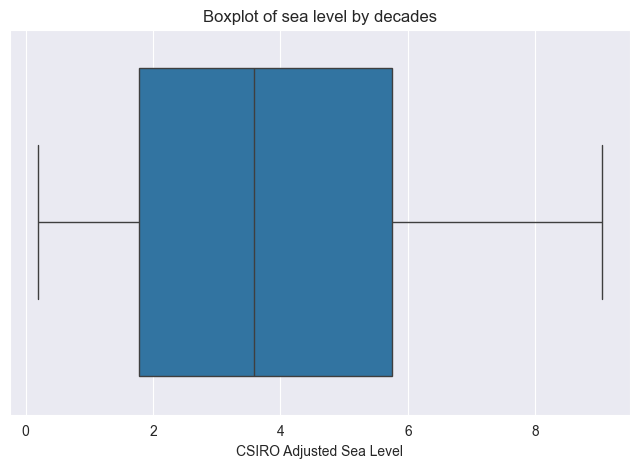

In [210]:
# Group df by decades
df['Decade'] = (df['Year'] // 10 * 10).astype(str)
df_decades = df.sort_values('Decade')
df_decades = df_decades.groupby('Decade').mean()
print(df_decades.head())
print(df_decades.tail())

# Plot data
plt.figure(figsize=(8,5))
sns.boxplot(x=df_decades['CSIRO Adjusted Sea Level'])
plt.title('Boxplot of sea level by decades')
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  


In [211]:
# Separate data to centuries
df_20th = df[(df['Year'] >= 1900) & (df['Year'] < 2000)] 
df_21st = df[(df['Year'] >= 2000)]

# Select only the needed column
df_20th = df_20th['CSIRO Adjusted Sea Level']
df_21st = df_21st['CSIRO Adjusted Sea Level']

# Run test
t_stat, p_val = ttest_ind(df_20th, df_21st, equal_var=False)

# Output results
print("Two-sample T-test (20th vs. 21st century):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")
print("20th Century sample size:", len(df_20th), "21st Century sample size:", len(df_21st))


Two-sample T-test (20th vs. 21st century):
T-statistic: -17.0626
P-value: 0.000000
20th Century sample size: 100 21st Century sample size: 14


## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


Rise counts per decade: Decade
1880    5
1890    7
1900    4
1910    5
1920    6
1930    7
1940    5
1950    7
1960    6
1970    4
1980    7
1990    8
2000    9
2010    3
Name: Sea Level Rise, dtype: int64
Estimated Poisson λ: 5.93
Observed frequencies: [1 2 3 2 4 1 1]
Synthetic frequencies: [1 3 1 2 1 3 1 1 1]
Chi-Square Test: χ²=16.67, p=0.0338
Poisson synthetic data does not fit well with observed data.


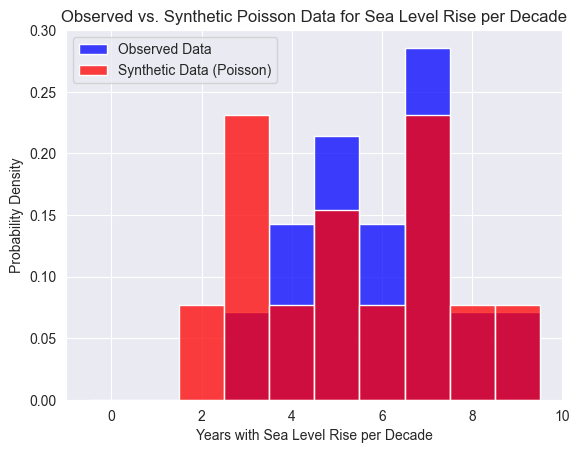

In [212]:
# Poisson is used with count based data, so I decided to check against years when sea level has risen for each decade.

# Create column for previous year value
df['Prev Year Sea Level'] = df['CSIRO Adjusted Sea Level'].shift(1)

# Check for rise / fall compared to previous year
df['Sea Level Rise'] = df['CSIRO Adjusted Sea Level'] > df['Prev Year Sea Level']

# Count rise events per decade
rise_count = df.groupby('Decade')['Sea Level Rise'].sum()
print("Rise counts per decade:", rise_count)

# Generate data based on poisson distribution

# Estimate poisson mean
lambda_est = np.mean(rise_count)
print(f"Estimated Poisson λ: {lambda_est:.2f}")

# Generate synthetic Poisson data based on λ
num_decades = len(rise_count)
synthetic_rise_counts = np.random.poisson(lambda_est, num_decades)

# Count observed frequencies
observed_freqs = rise_count.value_counts().sort_index().values
print(f"Observed frequencies: {observed_freqs}")

# Count synthetic frequencies
synthetic_freqs = pd.Series(synthetic_rise_counts).value_counts().sort_index().values
print(f"Synthetic frequencies: {synthetic_freqs}")

# Match bins
max_rise = max(max(rise_count), max(synthetic_rise_counts))
observed_freqs_full = np.zeros(max_rise + 1)
synthetic_freqs_full = np.zeros(max_rise + 1)

# Fill in observed and synthetic frequencies into their respective bins
for i in range(len(observed_freqs)):
    observed_freqs_full[i] = observed_freqs[i]
for i in range(len(synthetic_freqs)):
    synthetic_freqs_full[i] = synthetic_freqs[i]
    
# Remove bins where both observed and synthetic frequencies are zero
non_zero_bins = (observed_freqs_full > 0) | (synthetic_freqs_full > 0)
observed_freqs_filtered = observed_freqs_full[non_zero_bins]
synthetic_freqs_filtered = synthetic_freqs_full[non_zero_bins]

# Perform Chi-Square test to compare observed vs. synthetic frequencies
chi2, p_value = stats.chisquare(f_obs=observed_freqs_filtered, f_exp=synthetic_freqs_filtered)
print(f"Chi-Square Test: χ²={chi2:.2f}, p={p_value:.4f}")

# Check if the synthetic Poisson data fits well
if p_value > 0.05:
    print("Poisson synthetic data fits well with observed data.")
else:
    print("Poisson synthetic data does not fit well with observed data.")

# Plot data

# Plot comparison of observed vs. synthetic data
sns.histplot(rise_count, bins=np.arange(0, max(rise_count) + 2) - 0.5, kde=False, color="blue", label="Observed Data", stat="density")
sns.histplot(synthetic_rise_counts, bins=np.arange(0, max(rise_count) + 2) - 0.5, kde=False, color="red", label="Synthetic Data (Poisson)", stat="density")

plt.xlabel("Years with Sea Level Rise per Decade")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Observed vs. Synthetic Poisson Data for Sea Level Rise per Decade")
plt.show()

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  

In [213]:
# Get separate data columns
csiro_levels = df['CSIRO Adjusted Sea Level']
noaa_levels = df['NOAA Adjusted Sea Level']

# Perform correlation check
correlation = csiro_levels.corr(noaa_levels)

# Print correlation coefficient
print(f'Correlation coefficient: {correlation:.4f}')

Correlation coefficient: 0.9767


## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

## Exercise 1 ##
The dataset has yearly sea level data from 134 years. There are also 21 years of data included in a different system.

## Exercise 2 ##
The sea level data doesn't seem to have any outliers, meaning radically different values that could be included due to an error.

## Exercise 3 ##
The data grouped by decades further emphasizes the trend of sea levels rising.

## Exercise 4 ##
The two-sample t-test results show that as the t-stat is large in magnitude, there is a strong difference between the comparison groups. The low p-stat means that this should not be by chance. The t-stat being negative tells that the sea level rise in 21st century is higher than in 20th century.

## Exercise 5 ##
As poisson is used for periodical data, I split the dataset into decades and counted the years when sea level has risen from previous year. I generated a random set of numbers according to poisson distribution, and compared the frequency of years when sea level rised using chi-squared test. The results seem to show that the frequency of years when sea level rises fits to a poisson distribution pretty well.

## Exercise 6 ##
The correlation analysis shows that the CSIRO Adjusted Sea Level and NOAA Adjusted Sea Level are strongly correlated, which it should be as they are observing the same phenomenon.